In [1]:
"""
    Package Installation
"""
__author__ = "SakibApon"
__email__ = "sakibapon7@gmail.com"


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import re
import json
import os 
import tensorflow as tf
import sklearn
from joblib import dump, load
import seaborn as sbs
import sklearn.naive_bayes 
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/sarcasmfinal/ProcessedSarcasmData.csv
/kaggle/input/sarcasmcompletedataset/Bangla_dataset-by-me (1).csv
/kaggle/input/sarcasmcompletedataset/Bangla-data-100-arjun.xlsx
/kaggle/input/sarcasmcompletedataset/English-Sarcasm-new-by-me.csv
/kaggle/input/sarcasmcombined4k/CombinedSarcasm.csv


In [2]:
df = pd.read_csv('../input/sarcasmfinal/ProcessedSarcasmData.csv')
df

,Comments,Label
0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0
...,...,...
5107,আলগা পিরিতি। কিন্তু নিজের জেলার মানুষ কষ্ট করত...,0.0
5108,ফেইসবুক ছাড়া আপনাদের আর কোথাও দেখা মেলেনা।,0.0
5109,শুধু ঢাকাই বসে বসে বকবক করা ছাড়া কিছু করবে না ...,0.0
5110,সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।,0.0


In [3]:
#Empty Comments Removing
"""l = [2363, 2366, 2373, 2375, 2380, 2390, 2392, 2402, 2404, 2412, 2416, 2985]
for i in l:
    if (df['Comments'][i]):
        df = df.drop(i)
        
df.reset_index(drop=True, inplace=True)
print(len(df))"""

#Empty Label Removing & FLoat to Int
for i in range(len(df)):
    try:
        df['Label'][i] = int(df['Label'][i])
    except: 
        df['Label'][i] = int(0)
        
df['Label'] = df['Label'].astype(int)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Comments,Label
0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1
1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1
2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1
4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1
...,...,...
5107,আলগা পিরিতি। কিন্তু নিজের জেলার মানুষ কষ্ট করত...,0
5108,ফেইসবুক ছাড়া আপনাদের আর কোথাও দেখা মেলেনা।,0
5109,শুধু ঢাকাই বসে বসে বকবক করা ছাড়া কিছু করবে না ...,0
5110,সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।,0


Now check the distribution (ratio) of our target `is_sarcastic`.

In [4]:
df.Label.value_counts(normalize=True), df.Label.value_counts()

(0    0.617958
 1    0.382042
 Name: Label, dtype: float64,
 0    3159
 1    1953
 Name: Label, dtype: int64)

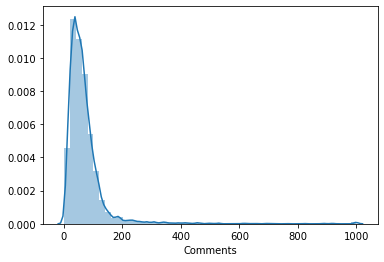

In [5]:
# A birdview of headline length. Seems the majority has a length of 70, that's about 5 to 15 words, which makes sence.
sbs.distplot(df.Comments.str.len())

In [6]:
df.describe(include='all')

,Comments,Label
count,5051,5112.000000
unique,4638,NaN
top,"আমি এখনই ব্যস্ত, আমি কি আপনাকে অন্য কোনও সময় ...",NaN
freq,8,NaN
mean,NaN,0.382042
std,NaN,0.485934
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


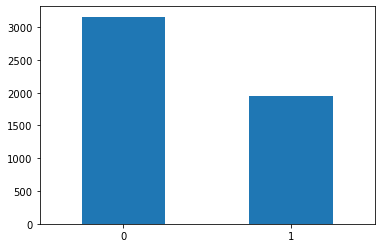

In [7]:
df['Label'].value_counts().plot(kind="bar", rot=0)

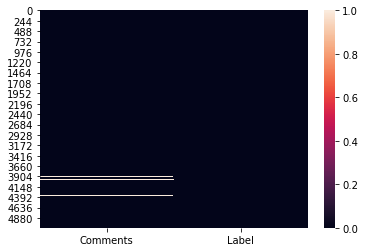

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

In [9]:
print(df[df['Comments'].isnull()].index.tolist())

[2363, 2366, 2373, 2375, 2380, 2390, 2392, 2402, 2404, 2412, 2416, 2985, 3868, 3871, 3878, 3880, 3885, 3895, 3897, 3907, 3909, 3917, 3921, 3932, 3944, 3950, 3953, 3958, 3960, 3962, 3976, 3986, 3988, 4004, 4016, 4018, 4021, 4036, 4041, 4050, 4057, 4067, 4070, 4072, 4310, 4319, 4329, 4333, 4335, 4347, 4352, 4354, 4356, 4361, 4364, 4388, 4393, 4397, 4414, 4418, 4420]


In [10]:
l = [2363,2366,2373,2375,2380,2390,2392,2402,2404,2412,2416,2985,3868,3871,3878,3880,3885,3895,3897,3907,3909,3917,3921,3932,3944,3950,3953,3958,3960,3962,3976,3986,3988,4004,4016,4018,4021,4036,4041,4050,4057,4067,4070,4072,4310,4319,4329,4333,4335,4347,4352,4354,4356,4361,4364,4388,4393,4397,4414,4418,4420]
for i in l:
    if (df['Comments'][i]):
        df = df.drop(i)
df.reset_index(drop=True, inplace=True)

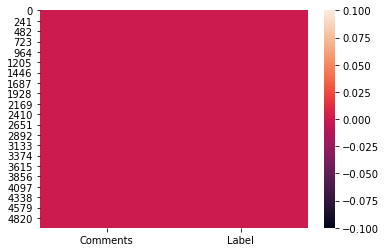

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.to_csv('ProcessedSarcasm.csv', encoding='utf-8', index=False)

## Bangla Preprocessing**

In [13]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [14]:
df.loc[65,'Comments']

'“আমার নীরবতার অর্থ এই নয় যে আমি আপনার সাথে একমত।এটা ঠিক যে আপনার অজ্ঞতার স্তরটি আমাকে নির্বাক করে দিয়েছে ”"'

In [15]:
for i, sent  in enumerate(df['Comments'].tolist()):
    df.loc[i,'clean_Comments'] = clean_sentence(sent)

In [16]:
test = df.loc[15,'clean_Comments']
test

'বোকামির বিরুদ্ধে সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা'

In [17]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [18]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [19]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : বোকামির বিরুদ্ধে সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা
after : বোকামির সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা


In [20]:
df['Comments'] = [remove_stop_words(tokenized_data(sent)) for sent in df['Comments'].tolist()]
#del df['sentence']
df.to_csv('clean_data.csv', encoding='utf-8', index=False)

In [ ]:
"""from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_Comments'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))


word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_Comments'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])


def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent
"""

The data is well-balanced, which is rare in reality but great for our practicing purpose.

Now we will try Naive Bayes as our base model.

## Building Base Model: Naive Bayes
First step, we should tokenize texts into vectors.

In [21]:
df.head()

,Comments,Label,clean_Comments
0,মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা...,1,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
1,যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি কোনও...,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
2,বাহ ... দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষী সা...,1,বাহ আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষী সা...
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1,হাহ মজার বিষয়আনোয়েড গ্রুআপ
4,থান্ডার 830 জেগে উঠলে ভালবাসুন,1,থান্ডার আমাকে এ জেগে উঠলে এটি ভালবাসুন


In [27]:
comment_vis = []
cleanComment_vis = []
for i in range(15,25):
    comment_vis.append(df['Comments'][i])
    cleanComment_vis.append(df['clean_Comments'][i])
    
df3 = pd.DataFrame(columns=['Comments', 'clean_Comments'])
df3['Comments'] = comment_vis
df3['clean_Comments'] = cleanComment_vis
df3

,Comments,clean_Comments
0,বোকামির সার্কাসম হ'ল দেহের প্রাকৃতিক প্রতিরক্ষা।,বোকামির বিরুদ্ধে সার্কাসম হল দেহের প্রাকৃতিক প...
1,“আমি কটাক্ষ ভালবাসি।এটি লোককে মুখে ঘুষি মারার ...,“আমি কটাক্ষ ভালবাসিএটি লোককে মুখে ঘুষি মারার ম...
2,"জীবন ভাল, পাওয়া উচিত।",জীবন ভাল আপনার একটি পাওয়া উচিত
3,সাবস্ক্রিপশন বাতিল করুন সমস্যাগুলির প্রয়োজন নেই।,আমার সাবস্ক্রিপশন বাতিল করুন কারণ আমার আপনার স...
4,"""আমি তালি দিয়েছি শেষ হয়েছে, পছন্দ করি না।""",আমি তালি দিয়েছি কারণ এটি শেষ হয়েছে আমি এটি প...
5,বলেন স্মার্ট জিনিসের ডলার থাকে।আমি দরিদ্র হব,আপনি যদি বলেন প্রতিটি স্মার্ট জিনিসের জন্য যদি...
6,যখন কথা বলছিলেন তখন দুঃখিত যখন ধারণাটি যত্ন নি...,আপনি যখন কথা বলছিলেন তখন আমি দুঃখিত আমি যখন আম...
7,"“না, আপনাকে পুনরাবৃত্তি করতে না।আমি আপনাকে প্র...",“না আপনাকে নিজের পুনরাবৃত্তি করতে হবে নাআমি আপ...
8,সারকাসম হ'ল গোপন ভাষা যা প্রত্যেকে যখন মুখের অ...,সারকাসম হল গোপন ভাষা যা প্রত্যেকে যখন আপনার মু...
9,না নাম গুগল না তবে সমস্ত জানেন তেমন অভিনয় করা...,যদি না আপনার নাম গুগল না হয় তবে আপনি যেমন সমস...


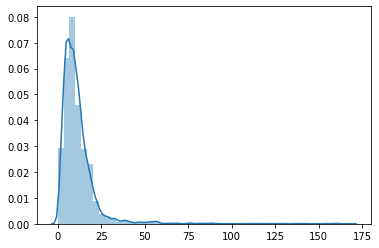

In [28]:
vocab_size = 10000 # max_features 
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df.clean_Comments)
train_inputs = tokenizer.texts_to_sequences(df.clean_Comments)
sbs.distplot([len(l) for l in train_inputs])

See, the above graph confirms our guess: most headline has 5 - 15 words. 


In [29]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs, padding='post', maxlen=20)
train_labels = df['Label']
score = []
# Split data into train /validation 
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(train_inputs, train_labels, test_size=0.2, random_state=0)
train_inputs[0]

array([   2,   32,   21,   41, 2295,  805, 2296, 1517, 1517,  746,   72,
         14,   14,   48,   48,   35,    0,    0,    0,    0], dtype=int32)

In [32]:
nb = sklearn.naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
nb_score = round((nb.score(X_val, y_val)*100),2)
#score.append(["Gradient Boosting", GRADIENT_score])
print("MultinomialNB Accuracy: {}%".format(nb_score))

y_preds = nb.predict(X_val)
print(f"Validation Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

MultinomialNB Accuracy: 64.79%
Validation Accuracy score 0.6478733926805144
Classification report
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       616
           1       0.54      0.68      0.60       395

    accuracy                           0.65      1011
   macro avg       0.65      0.65      0.64      1011
weighted avg       0.67      0.65      0.65      1011



In [31]:
from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=5, random_state=42)
grad.fit(X_train, y_train)
GRADIENT_score = round((grad.score(X_val, y_val)*100),2)
#score.append(["Gradient Boosting", GRADIENT_score])

print("Gradient Boosting Classifier Accuracy: {}%".format(GRADIENT_score))
print(f"Validation Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

# save the model to disk
dump(grad, 'Gradient{}.joblib') 

Gradient Boosting Classifier Accuracy: 71.91%
Accuracy score 0.6478733926805144
Classification report
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       616
           1       0.54      0.68      0.60       395

    accuracy                           0.65      1011
   macro avg       0.65      0.65      0.64      1011
weighted avg       0.67      0.65      0.65      1011



['Gradient{}.joblib']

In [33]:
from sklearn.naive_bayes import GaussianNB
#GradientBoostingClassifier
gnb  = GaussianNB()
gnb .fit(X_train, y_train)
gnb_score = round((gnb .score(X_val, y_val)*100),2)
#score.append(["Gradient Boosting", GRADIENT_score])
print("Gradient Boosting Classifier Accuracy: {}%".format(gnb_score))\

print(f"Validation Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

# save the model to disk
dump(gnb , 'Gradient{}.joblib') 

Gradient Boosting Classifier Accuracy: 48.47%
Validation Accuracy score 0.6478733926805144
Classification report
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       616
           1       0.54      0.68      0.60       395

    accuracy                           0.65      1011
   macro avg       0.65      0.65      0.64      1011
weighted avg       0.67      0.65      0.65      1011



['Gradient{}.joblib']

In [ ]:
"""from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)
y_preds = linear_svc.predict(X_val)

print(f"Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))"""

In [34]:
def Accloss(param):
    plt.plot(history.history[param])
    plt.plot(history.history['val_{}'.format(param)])
    plt.title('Model {}'.format(param))
    plt.ylabel(param)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
def ReportMatrix(model):
    modelPred = argmax(model.predict(X_val),axis=1)

    #Classification Report 
    y_true = y_val
    y_pred = modelPred
    target_names = ['class 0', 'class 1']
    print(classification_report(y_true, y_pred, target_names=target_names))

    #Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
def roc():
    y_prob = model.predict(X_val) 
    y_pred_prob = y_prob.argmax(axis=-1)

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Another model: Keras LSTM

In [37]:
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(vocab_size, 128)(text_input)

net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)

output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 128)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 64)            41216     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080

In [38]:
metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy',   verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0002)
    
callbacks = [mc, es, learning_rate_reduction]

history = model.fit(X_train, y_train,  epochs=100, batch_size=256, callbacks=callbacks, validation_data = (X_val, y_val), verbose=1)

Train on 4040 samples, validate on 1011 samples
Epoch 1/100
3840/4040 [===========================>..] - ETA: 0s - loss: 0.6677 - accuracy: 0.6130 - precision_1: 0.4462 - recall_1: 0.0196 - auc_1: 0.5511
Epoch 00001: val_accuracy improved from -inf to 0.60930, saving model to model_best.hdf5
4040/4040 [==============================] - 4s 1ms/sample - loss: 0.6674 - accuracy: 0.6126 - precision_1: 0.4462 - recall_1: 0.0186 - auc_1: 0.5508 - val_loss: 0.6445 - val_accuracy: 0.6093 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.7266
Epoch 2/100
3328/4040 [=======================>......] - ETA: 0s - loss: 0.6137 - accuracy: 0.6133 - precision_1: 1.0000 - recall_1: 0.0054 - auc_1: 0.7371      
Epoch 00002: val_accuracy improved from 0.60930 to 0.67458, saving model to model_best.hdf5
4040/4040 [==============================] - 0s 123us/sample - loss: 0.6015 - accuracy: 0.6238 - precision_1: 0.9750 - recall_1: 0.0250 - auc_1: 0.7603 - val_loss: 0.5305 - val_accurac

In [40]:
model = tf.keras.models.load_model('model_best.hdf5')
y_preds = model.predict(X_val, batch_size=1024).round().astype(int)
print("Test accracy score", sklearn.metrics.accuracy_score(y_val, y_preds))

Test accracy score 0.9495548961424333


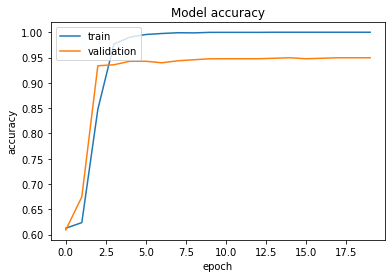

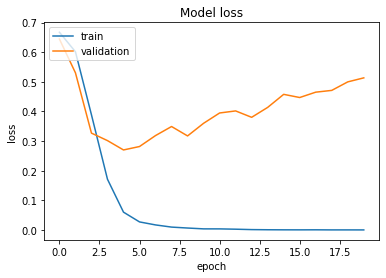

              precision    recall  f1-score   support

     class 0       0.61      1.00      0.76       616
     class 1       0.00      0.00      0.00       395

    accuracy                           0.61      1011
   macro avg       0.30      0.50      0.38      1011
weighted avg       0.37      0.61      0.46      1011



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


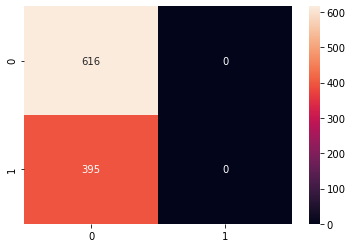

In [41]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

In [42]:
%%time
import gensim.downloader as api

def embed_word_vector(word_index, pretrained='word2vec-google-news-300'):
    embed_size = 300 # Google news vector is 300-dimensional
    vector = api.load(pretrained)
    zeros = [0] * embed_size
    matrix = np.zeros((vocab_size, embed_size)) 
    
    for word, i in word_index.items():
        if i >= vocab_size or word not in vector: continue 
        matrix[i] = vector[word]
    
    print("Embed word vector completed.")
    return matrix

CPU times: user 71.1 ms, sys: 26.1 ms, total: 97.2 ms
Wall time: 218 ms


In [43]:
%%time
pretrained = 'glove-wiki-gigaword-300'
matrix = embed_word_vector(tokenizer.word_index, pretrained=pretrained)

[=================================-----------------] 67.1% 252.3/376.1MB downloadedEmbed word vector completed.
CPU times: user 4min 32s, sys: 9.65 s, total: 4min 42s
Wall time: 4min 47s


In [44]:
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(vocab_size, 300, weights=[matrix], trainable=False)(text_input)

net = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)

output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 20, 300)           3000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 256)           330240    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080

In [45]:
metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

mc = tf.keras.callbacks.ModelCheckpoint('model_best_embed.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0002)
    
callbacks = [mc, es, learning_rate_reduction]

history = model.fit(X_train, y_train, epochs=50, batch_size=256, callbacks=callbacks, validation_data = (X_val, y_val), verbose=1)

Train on 4040 samples, validate on 1011 samples
Epoch 1/50
3840/4040 [===========================>..] - ETA: 0s - loss: 0.6807 - accuracy: 0.6151 - precision_2: 0.4865 - recall_2: 0.0244 - auc_2: 0.5079       
Epoch 00001: val_accuracy improved from -inf to 0.61227, saving model to model_best_embed.hdf5
4040/4040 [==============================] - 4s 1ms/sample - loss: 0.6807 - accuracy: 0.6139 - precision_2: 0.4865 - recall_2: 0.0231 - auc_2: 0.5057 - val_loss: 0.6685 - val_accuracy: 0.6123 - val_precision_2: 1.0000 - val_recall_2: 0.0076 - val_auc_2: 0.5063
Epoch 2/50
3840/4040 [===========================>..] - ETA: 0s - loss: 0.6722 - accuracy: 0.6154 - precision_2: 1.0000 - recall_2: 0.0040 - auc_2: 0.4881      
Epoch 00002: val_accuracy improved from 0.61227 to 0.61424, saving model to model_best_embed.hdf5
4040/4040 [==============================] - 0s 76us/sample - loss: 0.6720 - accuracy: 0.6158 - precision_2: 1.0000 - recall_2: 0.0039 - auc_2: 0.4874 - val_loss: 0.6698 - val

In [46]:
model = tf.keras.models.load_model('model_best_embed.hdf5')
y_preds = model.predict(X_val, batch_size=1024).round().astype(int)
print("Test accracy score", sklearn.metrics.accuracy_score(y_val, y_preds))

Test accracy score 0.6142433234421365


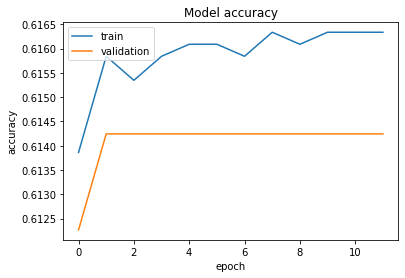

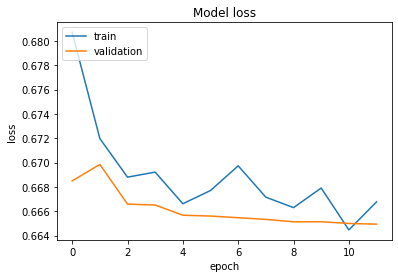

              precision    recall  f1-score   support

     class 0       0.61      1.00      0.76       616
     class 1       0.00      0.00      0.00       395

    accuracy                           0.61      1011
   macro avg       0.30      0.50      0.38      1011
weighted avg       0.37      0.61      0.46      1011



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


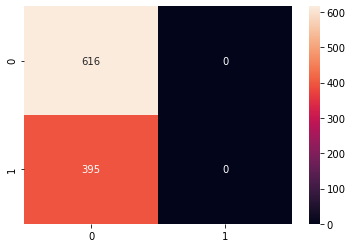

In [47]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

# BERT, NLP text classification killer

In [48]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [49]:
!pip install tokenization
!pip install bert-tensorflow==1.0.1

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [50]:
!pip install bert-tensorflow==1.0.1

     |████████████████████████████████| 67 kB 1.7 MB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [51]:
%%time
import tensorflow_hub as hub 
#import tokenization
from bert import tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 9.27 s, sys: 1.49 s, total: 10.8 s
Wall time: 11.1 s


In [52]:
import tensorflow as tf
tf.gfile = tf.io.gfile

In [53]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [82]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.TruePositives(),
              tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()]
    
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=metrics)
    
    return model

In [55]:
import sys
from absl import flags
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

['preserve_unused_tokens=False']

Remember in previous sections, we have explored on the headline length. Most of them has a length between 50 to 150, and the majority has a length of 70. We set the length to 120.

In [62]:
max_len = 100
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(df.clean_Comments, df['Label'],test_size=0.3, random_state=0)
X_train = bert_encode(X_train, tokenizer, max_len=max_len)
X_val = bert_encode(X_val, tokenizer, max_len=max_len)

Let's build the model and train on it.

In [80]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [83]:
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [84]:
%%time
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 5, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0001)
    
callbacks = [checkpoint, earlystopping, learning_rate_reduction]

train_history = model.fit(  X_train, y_train,  validation_data = (X_val, y_val), epochs=30, callbacks=callbacks,  batch_size=16, verbose=1)

Train on 3535 samples, validate on 1516 samples
Epoch 1/30
3520/3535 [============================>.] - ETA: 0s - loss: 0.1589 - accuracy: 0.9506 - precision_6: 0.9509 - recall_6: 0.9204 - auc_6: 0.9797 - true_positives: 1260.0000 - true_negatives: 2086.0000 - false_positives: 65.0000 - false_negatives: 109.0000
Epoch 00001: val_accuracy improved from -inf to 0.90369, saving model to model.h5
3535/3535 [==============================] - 68s 19ms/sample - loss: 0.1585 - accuracy: 0.9508 - precision_6: 0.9511 - recall_6: 0.9206 - auc_6: 0.9798 - true_positives: 1264.0000 - true_negatives: 2097.0000 - false_positives: 65.0000 - false_negatives: 109.0000 - val_loss: 0.3342 - val_accuracy: 0.9037 - val_precision_6: 0.8466 - val_recall_6: 0.9138 - val_auc_6: 0.9620 - val_true_positives: 530.0000 - val_true_negatives: 840.0000 - val_false_positives: 96.0000 - val_false_negatives: 50.0000
Epoch 2/30
3520/3535 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9659 - precis

In [85]:
%%time
model.load_weights('model.h5')
y_preds = model.predict(X_val).round().astype(int)
print("Validation accuracy: ", sklearn.metrics.accuracy_score(y_val, y_preds))

Validation accuracy:  0.924802110817942
CPU times: user 6.71 s, sys: 184 ms, total: 6.89 s
Wall time: 6.88 s


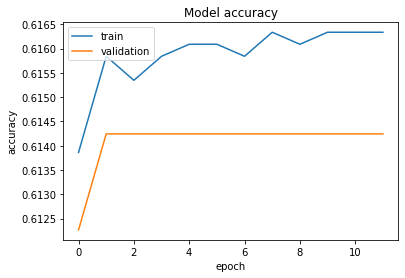

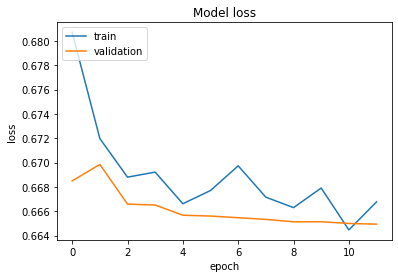

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     class 0       0.62      1.00      0.76       936
     class 1       0.00      0.00      0.00       580

    accuracy                           0.62      1516
   macro avg       0.31      0.50      0.38      1516
weighted avg       0.38      0.62      0.47      1516



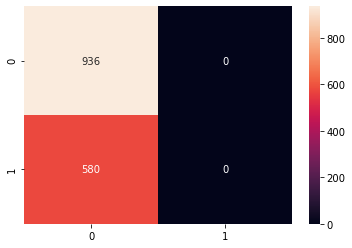

In [86]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

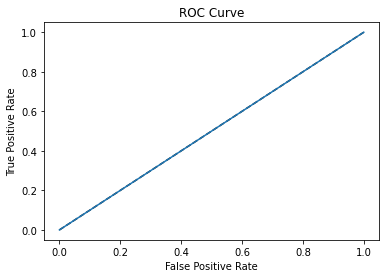

In [67]:
roc()